In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N=2**22 ## size
M=16 ## oversampling


In [3]:
## create high resolution data
ft=np.random.normal(0,1.0,N*M*2+2).view(np.complex128)
x=np.arange(N*M+1)/(N*M+1)
#sqrtps = N*M/2/(1+np.arange(N*M+1))
#sqrtps [sqrtps>1.0] = 1
sqrtps = np.exp(-x**2/(2*(1/(2*M))**2))
ft *= sqrtps
print(len(ft))
data = np.fft.irfft(ft)
print(len(data))

67108865
134217728


In [4]:
def calcps(da):
    ps=np.abs(np.fft.rfft(da)[:-1]**2)
    ## bin into 128 bins
    ps = ps.reshape((128,-1)).mean(axis=1)
    return ps

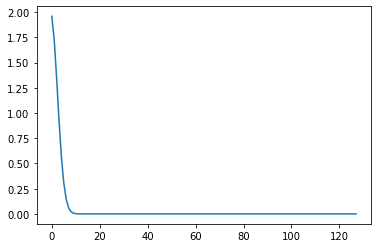

In [5]:
inputps=calcps(data)
plt.plot(inputps)

In [6]:
### Now get various version of data
data_sampled = data[::M]
data_averaged = data.reshape((-1,M)).mean(axis=1)
data_sampled_randomly = data[np.arange(2*N)*M+np.random.randint(0,M,2*N)]
print (data_sampled.shape, data_averaged.shape, data_sampled_randomly.shape)

(8388608,) (8388608,) (8388608,)


In [7]:
sampled_ps = calcps(data_sampled)
averaged_ps = calcps(data_averaged)
sampled_randomly_ps = calcps(data_sampled_randomly)

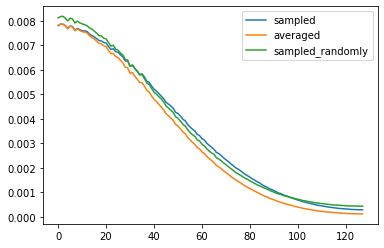

In [8]:
plt.plot(sampled_ps,label='sampled')
plt.plot(averaged_ps,label='averaged')
plt.plot(sampled_randomly_ps,label='sampled_randomly')
plt.legend()